# Ridge regressor, all features

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
import category_encoders as ce

from IPython.display import clear_output

from ridgeReg import RidgeReg

In [2]:
# load dataset
df = pd.read_csv("dataset.csv", index_col=0)
df["explicit"] = df["explicit"].astype(int)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
n,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


In [3]:
#separate dataset in X and y
X = df.drop('popularity',axis=1)
X = X.drop('track_id',axis=1)
y = df['popularity']
X

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
n,,,,,,,,,,,,,,,,,,
0,Gen Hoshino,Comedy,Comedy,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


In [4]:
# define function that will run the test
def runKFold(model,name,encoder):
  # start k fold
  kfold = RepeatedKFold(random_state=1,n_repeats=5,n_splits=5)
  train_scores = []
  test_scores = []
  train_mses = []
  test_mses = []
  for (train_index, test_index) in kfold.split(X):
    # separate data in train and test
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    # train the encoder on train data
    if(encoder.needs_y):
      enc = encoder.fit(X_train,y_train)
    else:
      enc = encoder.fit(X_train)
    # apply the encoding to both train and test data
    X_train_encoded = enc.transform(X_train)
    X_test_encoded = enc.transform(X_test)
    
    # train scaler on train data and apply it to both train and test data
    scaler = StandardScaler()
    scaler.fit(X_train_encoded)
    X_train_encoded_scaled = pd.DataFrame(scaler.transform(X_train_encoded),columns=X_train_encoded.columns)
    X_test_encoded_scaled = pd.DataFrame(scaler.transform(X_test_encoded),columns=X_test_encoded.columns)

    # train model
    model.fit(X_train_encoded_scaled,y_train)

    # predict values for popularity for both train and test set
    train_pred = model.predict(X_train_encoded_scaled)
    test_pred = model.predict(X_test_encoded_scaled)
    # print([(x,y) for (x,y) in zip(y_test,pred)])
    # calculate scores
    train_score = model.r2_score(y_train, train_pred)
    test_score = model.r2_score(y_test, test_pred)
    train_mse = model.mse(y_train,train_pred)
    test_mse = model.mse(y_test,test_pred)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    print((train_score,test_score))
    print((train_mse,test_mse))
  
  clear_output(wait=False)
  # calculate average of scores
  mean_train_score = sum(train_scores)/len(train_scores)
  mean_test_score = sum(test_scores)/len(test_scores)
  mean_train_mse = sum(train_mses)/len(train_mses)
  mean_test_mse = sum(test_mses)/len(test_mses)
  print(f"Average {name} R2 train score: {mean_train_score}")
  print(f"Average {name} R2 test score: {mean_test_score}")
  print(f"Average {name} MSE train: {mean_train_mse}")
  print(f"Average {name} MSE test: {mean_test_mse}")
  return mean_train_score, mean_test_score, mean_train_mse, mean_test_mse

In [5]:
import matplotlib.pyplot as plt
def plotResults(alphas,r2_train_scores,r2_test_scores,enc_name,data_type):
  x = alphas
  y_train = r2_train_scores
  y_test = r2_test_scores
  fig,ax = plt.subplots()
  color_1='red'
  color_2='green'
  if(data_type=='MSE'):
    color_1 = 'lightcoral'
    color_2 = 'lightgreen'
  ax.plot(x,y_test,linestyle='--',marker='o',color=color_1)
  ax.set_title(f"Alpha tuning, all features ({enc_name}) ({data_type})")
  ax.set_ylabel(f"{data_type} score (Test)",color='red')
  ax.tick_params(axis='y',labelcolor='red')
  ax.set_xlabel("Alpha")
  ax2 = ax.twinx()
  ax2.plot(x,y_train,linestyle='--',marker='o',color=color_2)
  ax2.set_ylabel(f"{data_type} score (Train)",color='green')
  ax2.tick_params(axis='y',labelcolor='green')
  ax.ticklabel_format(useOffset=False)
  ax2.ticklabel_format(useOffset=False)
  plt.show()

In [12]:
# finding best alpha for binary
encoder = ce.BinaryEncoder(cols=['artists','track_name','album_name','track_genre'])
encoder.needs_y = False

r2_train_scores = []
r2_test_scores = []
mse_train = []
mse_test = []
alphas = [0]
for alpha in alphas:
  res = runKFold(RidgeReg(alpha),f"Alpha{alpha}",encoder)
  r2_train_scores.append(res[0])
  r2_test_scores.append(res[1])
  mse_train.append(res[2])
  mse_test.append(res[3])
print(r2_test_scores)

Average Alpha0 R2 train score: 0.19462980185117482
Average Alpha0 R2 test score: -0.14827457112991213
Average Alpha0 MSE train: 400.6790982094166
Average Alpha0 MSE test: 571.2273896695704
[-0.14827457112991213]


In [13]:
-0.14827457112991213 - -0.05701215385201686

-0.09126241727789527

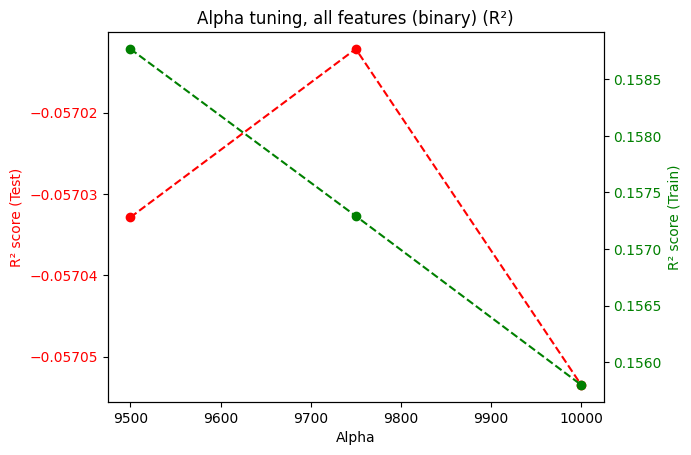

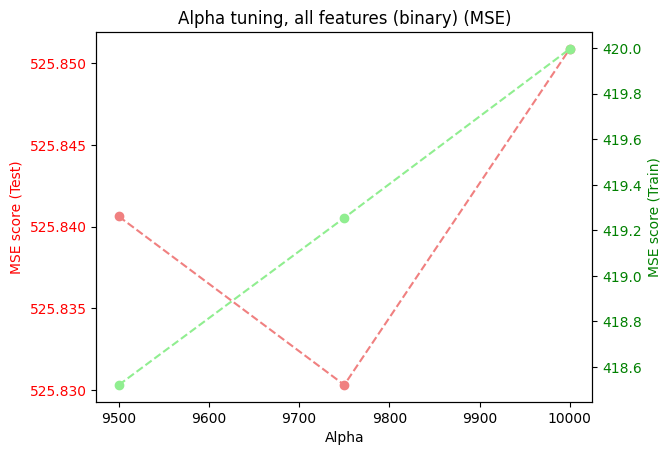

In [7]:
plotResults(alphas,r2_train_scores,r2_test_scores,'binary','R²')
plotResults(alphas,mse_train,mse_test,'binary','MSE')

In [8]:
# finding best alpha for target
encoder = ce.TargetEncoder(cols=['artists','track_name','album_name','track_genre'])
encoder.needs_y = True

r2_train_scores = []
r2_test_scores = []
mse_train = []
mse_test = []
alphas = [0,2,4,6,8,10]
for alpha in alphas:
  res = runKFold(RidgeReg(alpha),f"Alpha{alpha}",encoder)
  r2_train_scores.append(res[0])
  r2_test_scores.append(res[1])
  mse_train.append(res[2])
  mse_test.append(res[3])
print(r2_test_scores)


Average Alpha10 R2 train score: 0.7374958042265872
Average Alpha10 R2 test score: 0.6463959495510497
Average Alpha10 MSE train: 130.59868447171831
Average Alpha10 MSE test: 175.91329831183353
[0.6464064293100005, 0.6464043378987803, 0.6464022442169116, 0.6464001482647589, 0.6463980500426838, 0.6463959495510497]


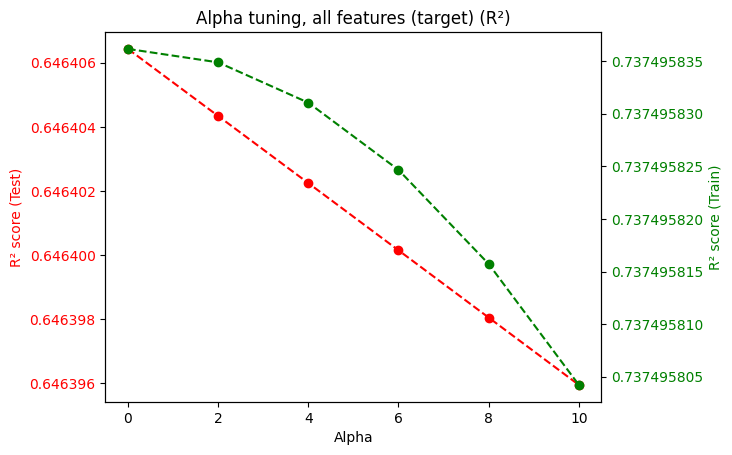

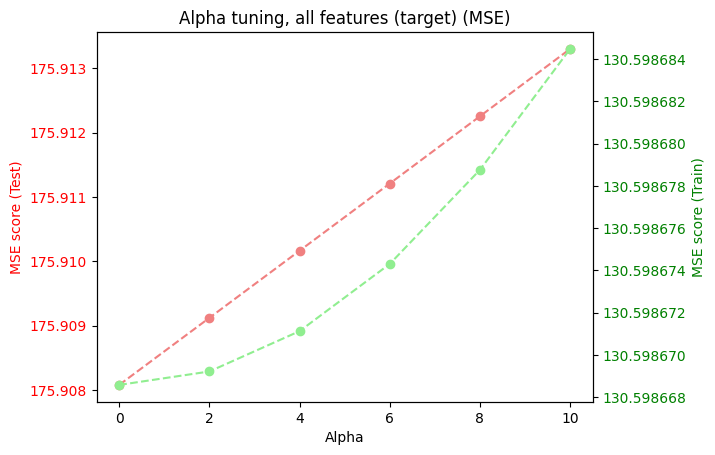

In [9]:
plotResults(alphas,r2_train_scores,r2_test_scores,'target','R²')
plotResults(alphas,mse_train,mse_test,'target','MSE')

In [10]:
# finding best alpha for catboost
encoder = ce.CatBoostEncoder(cols=['artists','track_name','album_name','track_genre'])
encoder.needs_y = True

r2_train_scores = []
r2_test_scores = []
mse_train = []
mse_test = []
alphas = [0,2,4,6,8,10]
for alpha in alphas:
  res = runKFold(RidgeReg(alpha),f"Alpha{alpha}",encoder)
  r2_train_scores.append(res[0])
  r2_test_scores.append(res[1])
  mse_train.append(res[2])
  mse_test.append(res[3])
print(r2_test_scores)
# 0.7194583908217779

Average Alpha10 R2 train score: 0.819099945896213
Average Alpha10 R2 test score: 0.7194414056534835
Average Alpha10 MSE train: 89.99963248696848
Average Alpha10 MSE test: 139.57622351586954
[0.7194583908217779, 0.7194550002742135, 0.719451606482564, 0.719448209447867, 0.7194448091711613, 0.7194414056534835]


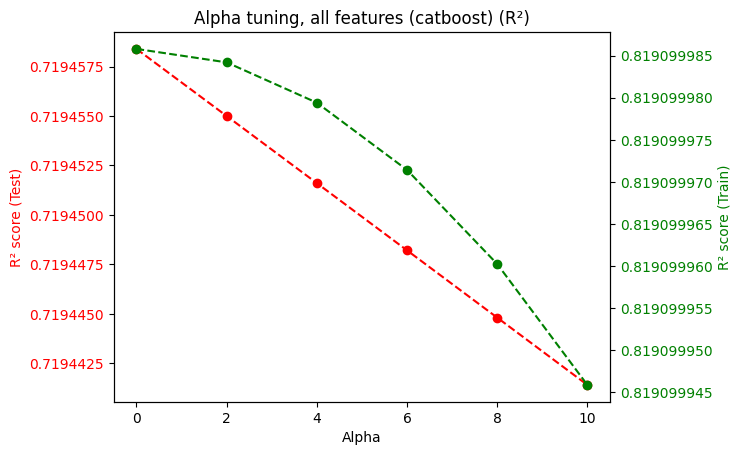

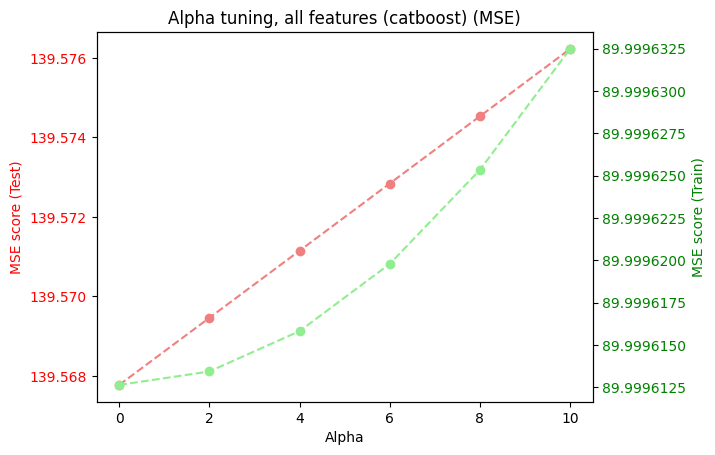

In [11]:
plotResults(alphas,r2_train_scores,r2_test_scores,'catboost','R²')
plotResults(alphas,mse_train,mse_test,'catboost','MSE')